In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', -1) 

sns.set_style("whitegrid")
sns.set_context("paper")

plt.rcParams['figure.figsize'] = (20,10)

In [94]:
df = pd.read_csv('./data/fut19.csv')

/home/carloscba/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [95]:
df.columns

Index(['player_ID', 'player_name', 'player_extended_name', 'quality',
       'revision', 'origin', 'overall', 'club', 'league', 'nationality',
       'position', 'age', 'date_of_birth', 'height', 'weight', 'intl_rep',
       'added_date', 'pace', 'pace_acceleration', 'pace_sprint_speed',
       'dribbling', 'drib_agility', 'drib_balance', 'drib_reactions',
       'drib_ball_control', 'drib_dribbling', 'drib_composure', 'shooting',
       'shoot_positioning', 'shoot_finishing', 'shoot_shot_power',
       'shoot_long_shots', 'shoot_volleys', 'shoot_penalties', 'passing',
       'pass_vision', 'pass_crossing', 'pass_free_kick', 'pass_short',
       'pass_long', 'pass_curve', 'defending', 'def_interceptions',
       'def_heading', 'def_marking', 'def_stand_tackle', 'def_slid_tackle',
       'physicality', 'phys_jumping', 'phys_stamina', 'phys_strength',
       'phys_aggression', 'gk_diving', 'gk_reflexes', 'gk_handling',
       'gk_speed', 'gk_kicking', 'gk_positoning', 'pref_foot', 'att_w

In [96]:
df.quality.unique()

array(['Gold - Rare', 'Gold', 'Silver - Rare', 'Silver', 'Bronze - Rare',
       'Bronze'], dtype=object)

In [97]:
leaguesMean = df.loc[:,['league','price_ps4','overall']].groupby(['league']).mean()

In [98]:
leaguesMean.sort_values(by = ['price_ps4','overall'], ascending=True)

,price_ps4,overall
league,,
Finnliiga,340.000000,60.666667
SSE Airtricity League,343.315508,58.294416
EFL League Two,424.775583,59.873311
K LEAGUE Classic,426.129032,64.281437
Allsvenskan,446.164773,63.016438
Meiji Yasuda J1 League,468.154158,62.884314
Domino’s Ligue 2,469.548872,65.218894
3. Liga,471.371769,62.242424
Hyundai A-League,473.842593,62.591743


In [99]:
league0 = df.loc[(df['league'] == 'Saudi Professional League')]

/home/carloscba/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


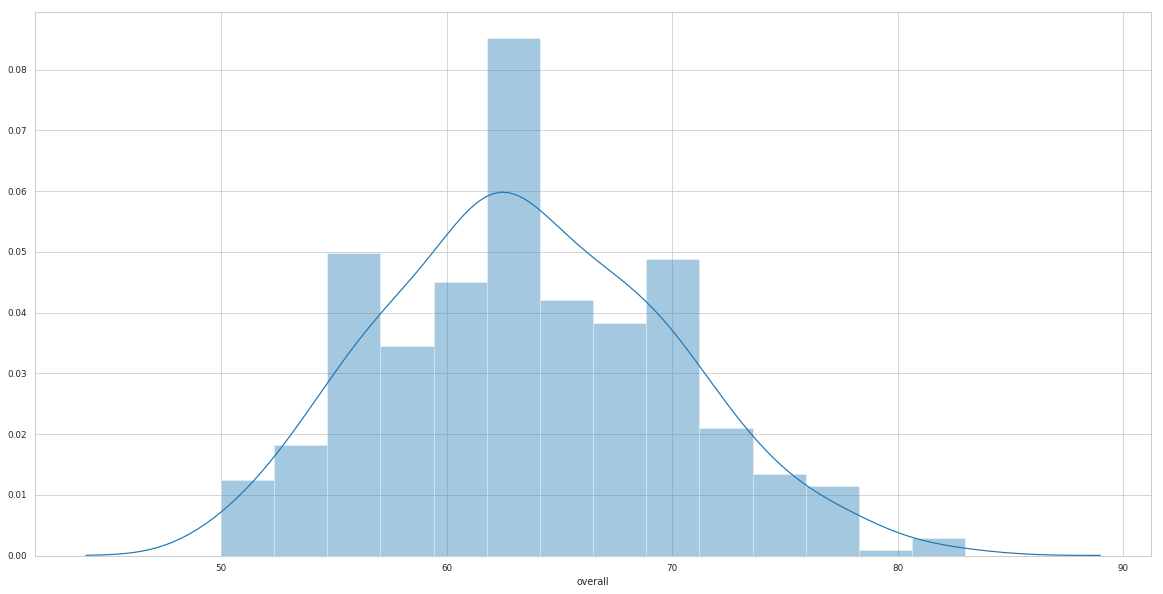

In [100]:
sns.distplot(league0.overall)

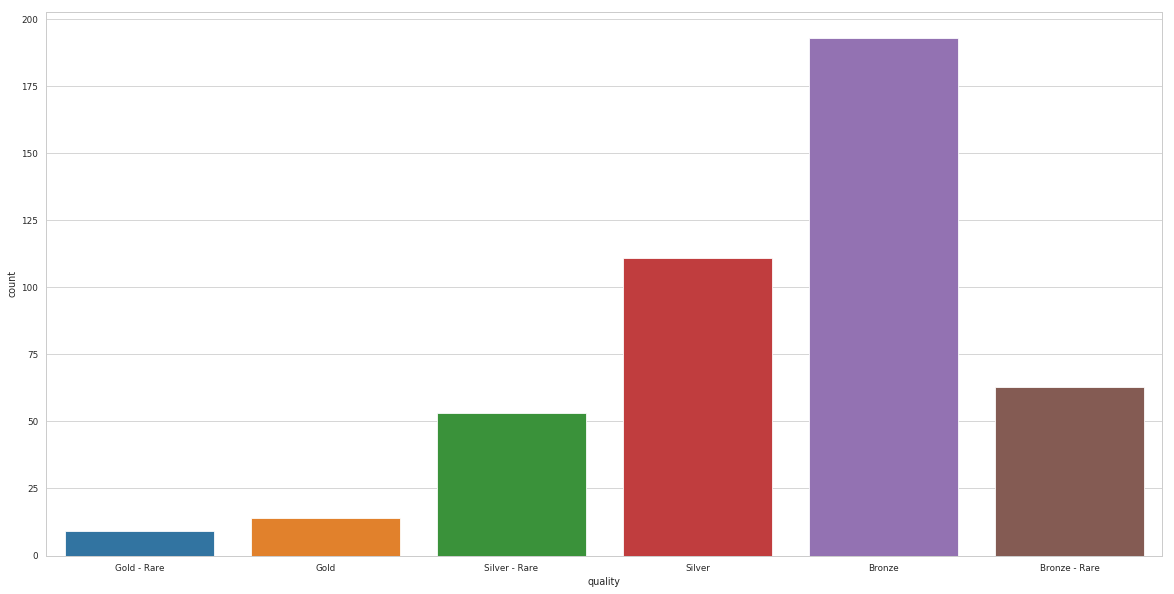

In [101]:
sns.countplot(league0.quality)

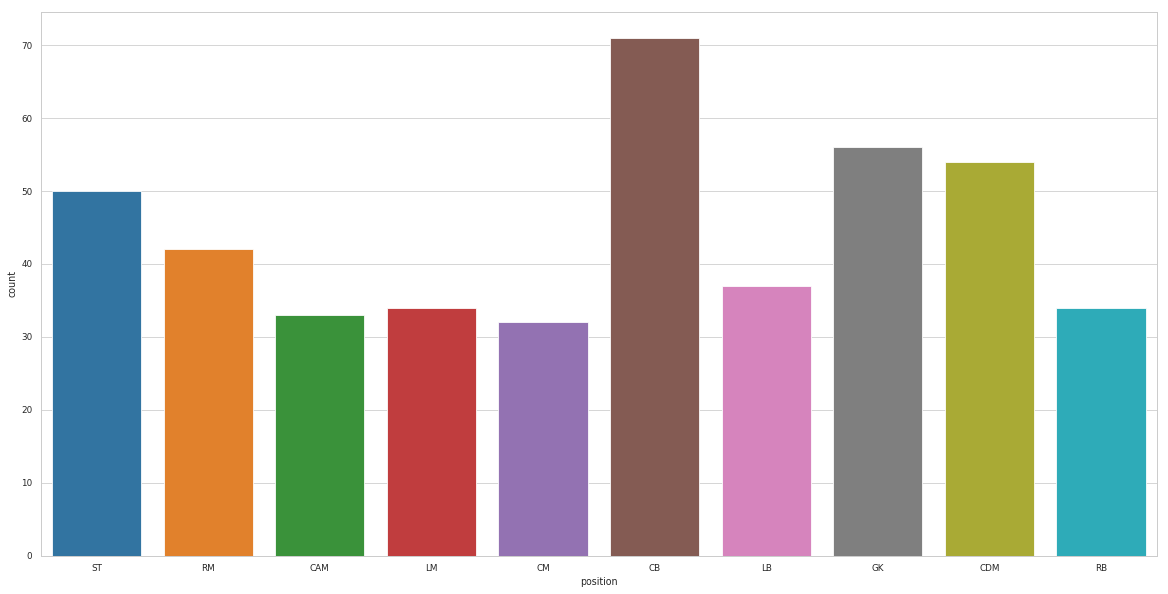

In [102]:
sns.countplot(league0.position)

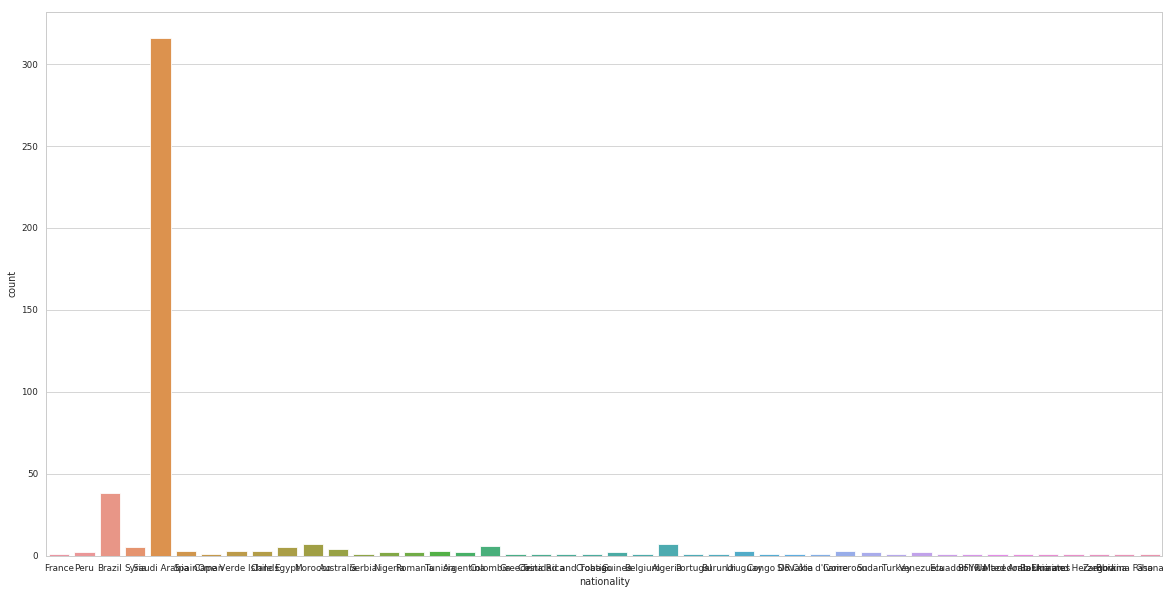

In [103]:
sns.countplot(league0.nationality)

/home/carloscba/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/carloscba/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/home/carloscba/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


ValueError: cannot convert float NaN to integer

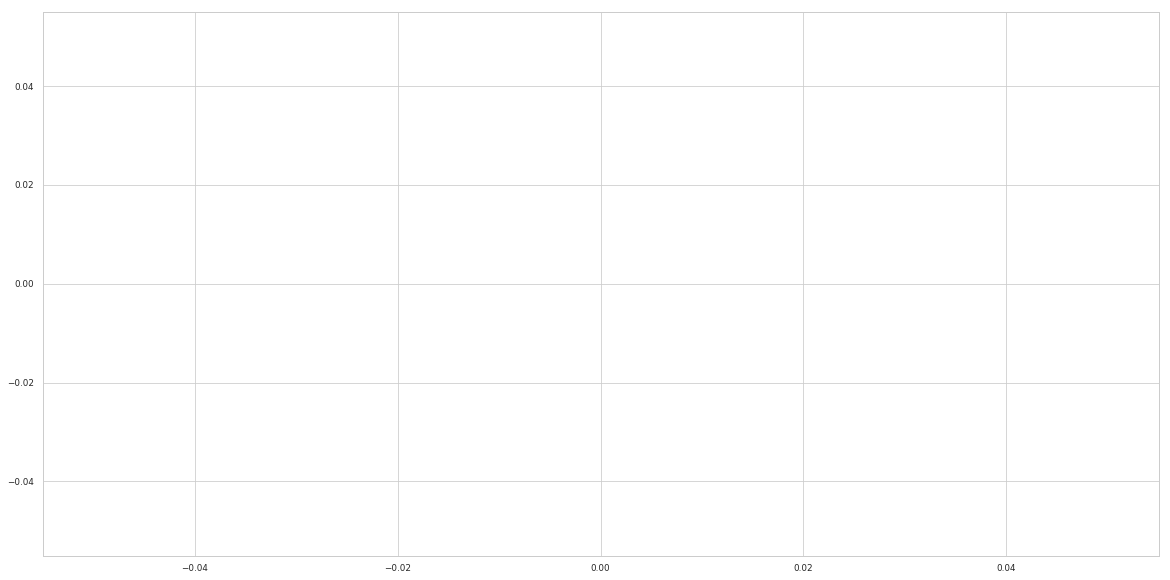

In [104]:
sns.distplot(league0.loc[(league0.quality == 'Bronze - Rare'), ['price_ps4']])

In [105]:
selectColumns = ['player_name', 'quality', 'overall', 'club', 'nationality', 'position','price_ps4']
players = league0.loc[(league0.quality == 'Silver - Rare') & (league0.overall > 68), selectColumns]

In [106]:
players.sort_values(by= ['overall','position'], ascending=False) 

,player_name,quality,overall,club,nationality,position,price_ps4
13513,Hamdallah,Silver - Rare,74,Al Nassr,Morocco,ST,1000.0
13554,Rivas,Silver - Rare,74,Al Hilal,Venezuela,ST,500.0
13634,Fernandão,Silver - Rare,74,Al Wehda,Brazil,ST,700.0
3870,Al Abed,Silver - Rare,74,Al Hilal,Saudi Arabia,LM,1200.0
3871,Al Faraj,Silver - Rare,74,Al Hilal,Saudi Arabia,CM,1600.0
12204,Anselmo,Silver - Rare,74,Al Wehda,Brazil,CDM,650.0
4022,Alexis,Silver - Rare,74,Al Ahli,Spain,CB,1300.0
13789,Marcos Guilherme,Silver - Rare,73,Al Wehda,Brazil,RM,900.0
3872,Botía,Silver - Rare,73,Al Hilal,Spain,CB,1000.0
4023,Hawsawi,Silver - Rare,73,Al Ahli,Saudi Arabia,CB,1800.0
